In [1]:
import plotly.express as px
from IPython.display import display
from ingest_stocks_to_df import IngestStocks
from keras_stock_preprocessing import KerasPreprocess
from model_stock_fit import ModelFit
from visualize_stocks import VisualizeStocks
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
from itertools import cycle
from keras.layers import Dense, GRU
from keras import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.preprocessing import timeseries_dataset_from_array
from keras.utils import model_to_dot, plot_model

# data

In [2]:
stocks_str = 'GSIT, ICAD, XAIR, LTRN, ARKK, ARKF, ARKW'
ticker_list = [ticker.strip() for ticker in stocks_str.upper().split(',')]
time_diff_years= 1
file_name = IngestStocks.get_file_name(ticker_list=ticker_list, time_diff_years=time_diff_years)

stocks_df = IngestStocks.ingest_stocks_to_df(ticker_list=ticker_list, time_diff_years=time_diff_years)
display(stocks_df)
stock_names = ticker_list[0:3]
column_metric = 'Adj Close'
# display(file_name)
# pd.read_pickle(file_name)

date    GSIT                                            ICAD  \
                         High    Low  Open Close  Volume Adj Close       High   
Date                                                                            
2020-03-02 2020-03-02  6.7400  6.550  6.67  6.68   33500      6.68  13.430000   
2020-03-03 2020-03-03  6.8500  6.540  6.63  6.63   46800      6.63  12.680000   
2020-03-04 2020-03-04  6.7700  6.570  6.63  6.73   73500      6.73  14.340000   
2020-03-05 2020-03-05  7.0300  6.650  6.65  6.79   31000      6.79  15.310000   
2020-03-06 2020-03-06  6.8200  6.560  6.72  6.65   29100      6.65  14.500000   
...               ...     ...    ...   ...   ...     ...       ...        ...   
2021-02-24 2021-02-24  7.7600  7.500  7.76  7.56   75600      7.56  18.430000   
2021-02-25 2021-02-25  7.7900  7.460  7.61  7.64  142600      7.64  18.879999   
2021-02-26 2021-02-26  7.7700  7.340  7.76  7.34   72700      7.34  19.160000   
2021-03-01 2021-03-01  7.7700  7.440  7.46  7.67  117000      7.67  19.250000   
2021-03-02 2021-03-02  7.7781  7.585  7.61  7.65   62559      7.65  19.370001   

                                  ...       ARKF                        \
                  Low       Open  ...       Open      Close     Volume   
Date                              ...                                    
2020-03-02  12.310000  13.300000  ...  24.730000  25.190001    60700.0   
2020-03-03  12.260000  12.680000  ...  25.299999  24.580000    44200.0   
2020-03-04  12.660000  12.660000  ...  24.840000  25.230000    65000.0   
2020-03-05  13.530000  14.030000  ...  24.730000  24.503000    35500.0   
2020-03-06  12.790000  13.500000  ...  23.940001  24.040001    62000.0   
...               ...        ...  ...        ...        ...        ...   
2021-02-24  17.250000  17.469999  ...  57.529999  57.590000  4827700.0   
2021-02-25  16.450001  18.879999  ...  57.459999  54.970001  6191200.0   
2021-02-26  17.700001  18.150000  ...  54.889999  55.279999  4845600.0   
2021-03-01  18.389999  18.969999  ...  57.169998  57.860001  3968700.0   
2021-03-02  18.390100  18.799999  ...  58.400002  57.080002  2849995.0   

                             ARKW                                      \
            Adj Close        High         Low        Open       Close   
Date                                                                    
2020-03-02  25.095531   65.000000   62.580002   64.279999   64.980003   
2020-03-03  24.487818   66.150002   62.340000   65.589996   63.439999   
2020-03-04  25.135380   65.239998   63.500000   64.620003   65.199997   
2020-03-05  24.411108   65.110001   63.240002   63.720001   63.779999   
2020-03-06  23.949844   62.514999   60.540001   61.869999   61.860001   
...               ...         ...         ...         ...         ...   
2021-02-24  57.590000  171.776001  165.910004  169.100006  170.539993   
2021-02-25  54.970001  171.509995  158.919998  168.910004  160.259995   
2021-02-26  55.279999  163.559998  155.949997  161.020004  160.889999   
2021-03-01  57.860001  168.449997  164.104004  166.000000  168.330002   
2021-03-02  57.080002  170.479996  164.389999  170.179993  164.389999   

                                   
               Volume   Adj Close  
Date                               
2020-03-02   557200.0   64.147308  
2020-03-03   410800.0   62.627037  
2020-03-04   174700.0   64.364479  
2020-03-05   177900.0   62.962681  
2020-03-06   258400.0   61.067287  
...               ...         ...  
2021-02-24  2399800.0  170.539993  
2021-02-25  3383600.0  160.259995  
2021-02-26  2701300.0  160.889999  
2021-03-01  2441300.0  168.330002  
2021-03-02  1534157.0  164.389999  

[253 rows x 43 columns]

# visualization

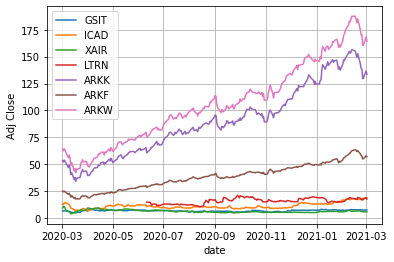

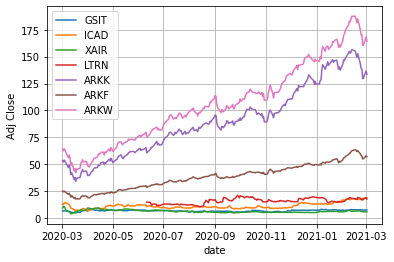

In [3]:
VisualizeStocks.add_stocks_fig(stock_names=ticker_list, column_metric=column_metric,stocks_df=stocks_df)

# fit

In [4]:
metric = 'Adj Close'
company_name = 'GSIT'
lookback_length=40
batch_size=30


In [5]:

train_ds, val_ds, test_ds = KerasPreprocess.keras_batch_preprocess(stocks_df=stocks_df, company_name=company_name, metric=metric, lookback_length=lookback_length, batch_size=batch_size)

mf = ModelFit
model=mf.gru_model()
history, model = mf.train_model(train_data=train_ds, validation_data=val_ds, model=model)

test_error = mf.evaluate_model(model, test_ds)

train_error = pd.DataFrame(history.history)
display(train_error)

Epoch 1/300
4/4 [==============================] - 3s 347ms/step - loss: 45.3403 - mse: 45.3403 - val_loss: 2.5036 - val_mse: 2.5036
Epoch 2/300
4/4 [==============================] - 0s 78ms/step - loss: 5.0471 - mse: 5.0471 - val_loss: 2.1123 - val_mse: 2.1123
Epoch 3/300
4/4 [==============================] - 0s 79ms/step - loss: 1.0049 - mse: 1.0049 - val_loss: 4.2897 - val_mse: 4.2897
Epoch 4/300
4/4 [==============================] - 0s 89ms/step - loss: 1.3259 - mse: 1.3259 - val_loss: 2.5158 - val_mse: 2.5158
Epoch 5/300
4/4 [==============================] - 0s 72ms/step - loss: 0.4191 - mse: 0.4191 - val_loss: 0.7824 - val_mse: 0.7824
Epoch 6/300
4/4 [==============================] - 0s 80ms/step - loss: 0.1902 - mse: 0.1902 - val_loss: 0.1241 - val_mse: 0.1241
Epoch 7/300
4/4 [==============================] - 0s 91ms/step - loss: 0.6489 - mse: 0.6489 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 8/300
4/4 [==============================] - 0s 70ms/step - loss: 0.8513 - mse: 0

,loss,mse,val_loss,val_mse
0,38.012451,38.012451,2.503584,2.503584
1,3.620064,3.620064,2.112250,2.112250
2,1.457994,1.457994,4.289669,4.289669
3,1.651281,1.651281,2.515841,2.515841
4,0.549699,0.549699,0.782446,0.782446
5,0.167106,0.167106,0.124126,0.124126
6,0.486021,0.486021,0.041309,0.041309
7,0.629916,0.629916,0.110534,0.110534
8,0.459161,0.459161,0.323568,0.323568
9,0.318208,0.318208,0.573016,0.573016


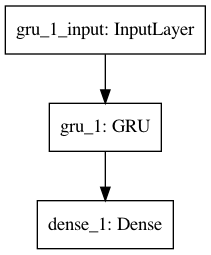

In [6]:
plot_model(model, expand_nested=True)

In [7]:
prediction_data = KerasPreprocess.get_prediction_data(stocks_df=stocks_df, company_name=company_name, metric=column_metric, lookback_length=lookback_length, latest_day=-lookback_length)

predictions = ModelFit.pred_next_days(future_num_days=30, previous_days=prediction_data, model=model)

ValueError: in user code:

    /Users/admin/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /Users/admin/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/admin/miniconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/admin/miniconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/admin/miniconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/admin/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /Users/admin/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /Users/admin/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/admin/miniconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1)
